In [10]:
import pandas as pd
import geopandas as gp
from shapely.geometry import Point
pd.options.display.max_columns = 999
%matplotlib inline

In [31]:
store = pd.HDFStore('E:/Transit-Casa-Alex/Input/Bus Performence/sfmuni_monthly_ts.h5')
bus = store.select('stop_day')

In [12]:
bus.head()

,MONTH,DOW,AGENCY_ID,STOP_ID,NUMDAYS,OBSDAYS,TRIP_STOPS,OBS_TRIP_STOPS,IMP_TRIP_STOPS,WGT_TRIP_STOPS,HEADWAY_S,FARE,STOPNAME,STOPNAME_AVL,STOP_LAT,STOP_LON,EOL,SOL,TIMEPOINT,ARRIVAL_TIME_DEV,DEPARTURE_TIME_DEV,DWELL_S,DWELL,RUNTIME_S,RUNTIME,TOTTIME_S,TOTTIME,SERVMILES_S,SERVMILES,RUNSPEED_S,RUNSPEED,TOTSPEED_S,TOTSPEED,ONTIME5,ON,OFF,LOAD_ARR,LOAD_DEP,PASSMILES,PASSHOURS,WAITHOURS,FULLFARE_REV,PASSDELAY_DEP,PASSDELAY_ARR,RDBRDNGS,DOORCYCLES,WHEELCHAIR,BIKERACK,CAPACITY,VC,CROWDED,CROWDHOURS
0,2009-06-01,1,SFMTA,390,12,9.0,306,42,0.0,310.963465,21.963047,2.0,19TH AVENUE & HOLLOWAY ST,19TH AVE&HOLLOWAY AVE NE-,37.721190,-122.475096,0,0,1.0,0.549835,1.169332,0.0,108.464336,274.720000,174.209742,274.720000,282.674078,28.833000,28.908172,6.30,9.96,6.30,6.14,0.667014,967.760026,1148.468829,5095.033314,4914.324510,548.407935,83.076549,130.406033,1935.520052,1847.828569,1517.972045,0.00,492.198414,0.000000,0.000000,4558.034091,0.262779,0.018177,6.447957
1,2009-06-01,1,SFMTA,392,12,9.0,121,14,0.0,120.984531,14.200601,2.0,19TH AVE & LINCOLN WAY,19TH AVE & LINCOLN WAY SE,37.765159,-122.477210,0,0,1.0,2.037840,2.316604,0.0,33.753304,85.300000,72.621021,85.300000,106.374325,14.520000,14.518144,10.21,11.99,10.21,8.19,0.618880,313.657453,148.987680,2617.602593,2782.272366,314.112311,41.855387,29.941117,627.314907,1035.164602,934.325468,0.00,173.097814,0.000000,0.658333,1487.750000,0.343401,0.019215,2.623462
2,2009-06-01,1,SFMTA,660,12,11.0,134,25,0.0,137.156398,16.185104,2.0,MISSION ST & OCEAN AVENUE,MISSION ST&OCEAN AVE -MI/,37.723914,-122.435387,0,0,1.0,1.374354,1.377834,0.0,0.512516,36.543333,79.408342,36.543333,79.920858,3.761333,3.840379,6.18,2.90,6.18,2.88,0.768081,2.936869,5.625590,1197.291050,1194.602329,33.524149,12.311748,0.492088,5.873738,5.531212,4.837134,0.00,1.551986,0.000000,0.280910,2712.877273,0.095350,0.000000,0.000000
3,2009-06-01,1,SFMTA,913,12,3.0,91,4,0.0,91.352199,24.548077,2.0,DUBLIN ST & LAGRANDE AVE,DUBLIN ST&LAGRANDE AVE S - EOL,37.719192,-122.425802,1,0,1.0,4.963878,5.340531,0.0,0.000000,32.830000,62.914058,32.830000,62.914058,3.496000,3.540510,6.39,3.38,6.39,3.38,0.579487,27.952917,18.493888,114.949343,124.408372,5.885778,1.362594,5.445855,55.905835,150.564845,142.774140,0.45,48.489296,0.000000,1.400000,2175.600000,0.019556,0.000000,0.000000
4,2009-06-01,1,SFMTA,3001,12,9.0,63,10,0.0,63.000000,12.666667,2.0,1ST ST & HOWARD ST,1ST ST&HOWARD ST E-MB/SI,37.788530,-122.396044,0,0,1.0,2.723276,2.734444,0.0,0.706234,43.610000,57.624639,43.610000,58.330872,4.284000,4.284000,5.89,4.46,5.89,4.41,0.685986,11.723564,3.130351,1172.833635,1181.426848,79.752687,19.666557,1.146347,23.447128,45.998115,43.404869,0.00,4.403377,0.727273,0.000000,1075.263636,0.295499,0.016327,1.859238


In [13]:
bus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316767 entries, 0 to 316766
Data columns (total 52 columns):
MONTH                 316767 non-null datetime64[ns]
DOW                   316767 non-null int64
AGENCY_ID             316767 non-null object
STOP_ID               316767 non-null int64
NUMDAYS               316767 non-null int64
OBSDAYS               316767 non-null float64
TRIP_STOPS            316767 non-null int64
OBS_TRIP_STOPS        316767 non-null int64
IMP_TRIP_STOPS        315415 non-null float64
WGT_TRIP_STOPS        314333 non-null float64
HEADWAY_S             315960 non-null float64
FARE                  316767 non-null float64
STOPNAME              316767 non-null object
STOPNAME_AVL          316767 non-null object
STOP_LAT              316767 non-null float64
STOP_LON              316767 non-null float64
EOL                   316767 non-null int64
SOL                   316767 non-null int64
TIMEPOINT             314445 non-null float64
ARRIVAL_TIME_DEV      314

,MONTH,DOW,AGENCY_ID,STOP_ID,NUMDAYS,OBSDAYS,TRIP_STOPS,OBS_TRIP_STOPS,IMP_TRIP_STOPS,WGT_TRIP_STOPS,HEADWAY_S,FARE,STOPNAME,STOPNAME_AVL,STOP_LAT,STOP_LON,EOL,SOL,TIMEPOINT,ARRIVAL_TIME_DEV,DEPARTURE_TIME_DEV,DWELL_S,DWELL,RUNTIME_S,RUNTIME,TOTTIME_S,TOTTIME,SERVMILES_S,SERVMILES,RUNSPEED_S,RUNSPEED,TOTSPEED_S,TOTSPEED,ONTIME5,ON,OFF,LOAD_ARR,LOAD_DEP,PASSMILES,PASSHOURS,WAITHOURS,FULLFARE_REV,PASSDELAY_DEP,PASSDELAY_ARR,RDBRDNGS,DOORCYCLES,WHEELCHAIR,BIKERACK,CAPACITY,VC,CROWDED,CROWDHOURS


In [32]:
bus = bus[bus['MONTH'].isin(pd.date_range('2009-10-01','2009-12-01'))]

In [33]:
bus_avg = bus.groupby(by = 'STOP_ID',as_index = False).mean()

In [34]:
bus_avg.head()

,STOP_ID,DOW,NUMDAYS,OBSDAYS,TRIP_STOPS,OBS_TRIP_STOPS,IMP_TRIP_STOPS,WGT_TRIP_STOPS,HEADWAY_S,FARE,STOP_LAT,STOP_LON,EOL,SOL,TIMEPOINT,ARRIVAL_TIME_DEV,DEPARTURE_TIME_DEV,DWELL_S,DWELL,RUNTIME_S,RUNTIME,TOTTIME_S,TOTTIME,SERVMILES_S,SERVMILES,RUNSPEED_S,RUNSPEED,TOTSPEED_S,TOTSPEED,ONTIME5,ON,OFF,LOAD_ARR,LOAD_DEP,PASSMILES,PASSHOURS,WAITHOURS,FULLFARE_REV,PASSDELAY_DEP,PASSDELAY_ARR,RDBRDNGS,DOORCYCLES,WHEELCHAIR,BIKERACK,CAPACITY,VC,CROWDED,CROWDHOURS
0,390,1.0,20.0,14.333333,305.333333,37.666667,4.333333,309.647192,21.013838,2.0,37.721190,-122.475096,0.0,0.0,1.0,0.627022,1.352912,0.0,127.712403,272.593333,175.499781,272.593333,303.212185,28.891000,28.886005,6.363333,9.876667,6.363333,5.733333,0.656873,1740.347956,1266.084377,5020.235376,5494.498956,537.332251,103.795881,368.898496,3480.695912,5247.879279,4355.254279,1.669655,481.349917,0.000000,0.000000,4816.739536,0.260252,0.024936,9.537020
1,392,1.0,20.0,15.333333,121.000000,15.333333,0.333333,120.969528,14.241923,2.0,37.765159,-122.477210,0.0,0.0,1.0,3.279302,3.589643,0.0,37.525337,85.300000,84.966859,85.300000,122.492196,14.520000,14.516343,10.210000,10.260000,10.210000,7.120000,0.590209,355.066913,224.271620,2754.098419,2884.893712,330.491810,50.782271,36.310560,710.133827,1713.229758,1571.334183,0.000000,205.457986,0.084967,1.116647,1662.337829,0.361369,0.015096,2.280410
2,660,1.0,21.0,16.000000,134.000000,12.500000,0.000000,140.547018,16.184855,2.0,37.723914,-122.435387,0.0,0.0,1.0,1.439164,1.439657,0.0,0.062150,36.455500,89.355535,36.455500,89.417685,3.753400,3.931923,6.180000,2.645000,6.180000,2.640000,0.606256,1.707568,2.367503,1279.055414,1278.395479,35.813552,14.657947,0.732532,3.415137,4.940786,4.940786,0.688724,0.279099,0.000000,0.159551,1714.957142,0.101660,0.000000,0.000000
3,913,1.0,20.0,7.333333,90.666667,10.000000,3.333333,92.757892,24.015385,2.0,37.719192,-122.425802,1.0,0.0,1.0,4.484013,4.845888,0.0,0.040952,35.043333,47.748801,35.043333,47.789754,3.470667,3.686298,5.993333,4.673333,5.993333,4.670000,0.513971,25.409037,43.180223,142.855479,125.084293,7.220268,1.406756,5.051821,50.818075,130.164548,119.146569,0.501623,59.713926,0.000000,0.190476,2689.390559,0.024660,0.000000,0.000000
4,3001,1.0,21.0,15.000000,63.000000,7.500000,0.000000,63.000000,12.666667,2.0,37.788530,-122.396044,0.0,0.0,1.0,1.273289,1.282387,0.0,0.574426,43.610000,51.011467,43.610000,51.585893,4.284000,4.284000,5.890000,5.055000,5.890000,4.995000,0.706345,15.566321,5.057707,1055.199082,1065.707696,71.753538,16.164223,1.394257,31.132642,32.882392,30.840459,0.000000,4.035251,0.000000,0.235294,946.073916,0.265860,0.008911,0.481497


In [21]:
comp_bus = bus_avg[['ON','OFF','HEADWAY_S','ONTIME5','STOP_ID','STOP_LAT',"STOP_LON"]]

In [22]:
comp_bus.head()

,ON,OFF,HEADWAY_S,ONTIME5,STOP_ID,STOP_LAT,STOP_LON
0,1740.347956,1266.084377,21.013838,0.656873,390,37.721190,-122.475096
1,355.066913,224.271620,14.241923,0.590209,392,37.765159,-122.477210
2,1.707568,2.367503,16.184855,0.606256,660,37.723914,-122.435387
3,25.409037,43.180223,24.015385,0.513971,913,37.719192,-122.425802
4,15.566321,5.057707,12.666667,0.706345,3001,37.788530,-122.396044


In [41]:
bus['geometry'] = [Point(xy) for xy in zip(bus.STOP_LON, bus.STOP_LAT)]

In [46]:
bus_geo = gp.GeoDataFrame(bus)

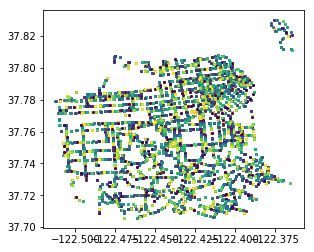

In [47]:
bus_geo.plot()